**Kuramoto model - Analytical solution**

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from scipy.linalg import expm, sinm, cosm

In [2]:
import csv
file = open("analytical.txt", "w")
writer = csv.writer(file)

In [3]:
A = Matrix([[0, 1, 1],
            [1, 0, 1],
            [1, 1, 0]]) # adjacency matrix

V, D = A.diagonalize()

A=np.array(A, dtype=np.complex128)
V=np.array(V, dtype=np.complex128)
print(V)
D=np.array(D,dtype=np.complex128)

[[-1.+0.j -1.+0.j  1.+0.j]
 [ 1.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  1.+0.j  1.+0.j]]


In [4]:
# Initial conditions
N = 3 # number of oscillators
w = np.array([10., 10., 10.])*(2.0*np.pi) # intrinsic angular frequency

k = 1. # coupling strength
gamma = (2.*k)/np.pi

theta0 = np.array([1.0+0j, -1.0+0j, 0.5+0j])*np.pi
print("i*theta0:", 1j* theta0)
x0 = np.exp(1j* theta0)
print("x0:", x0)


t0 = 0
dt = 0.001
steps = 1000

theta = np.zeros((steps,N)) # matrix which each vertical vector is the solution for each oscillator
time = []

for n in range(steps): 
    t = t0 + n*dt
    x = np.dot(np.dot(V, expm((np.diag(1j*w) + gamma*D)*t)), np.dot(np.linalg.inv(V), x0)) 
    x2 = np.dot(expm((np.diag(1j*w) + gamma*A)*t), x0)
    theta[n]=(np.arctan2(np.imag(x), np.real(x)))
    time.append(t)
    
    writer.writerow((t, theta[n][0], theta[n][1], theta[n][2]))

file.close()
print("x:", x)
print("x (wo/ diagonalization):", x2)

i*theta0: [ 0.+3.14159265j -0.-3.14159265j  0.+1.57079633j]
x0: [-1.000000e+00+1.2246468e-16j -1.000000e+00-1.2246468e-16j
  6.123234e-17+1.0000000e+00j]
x: [-2.48640869+1.17124957j -2.48640869+1.17124957j -1.9247964 +1.6663774j ]
x (wo/ diagonalization): [-2.48640869+1.17124957j -2.48640869+1.17124957j -1.9247964 +1.6663774j ]


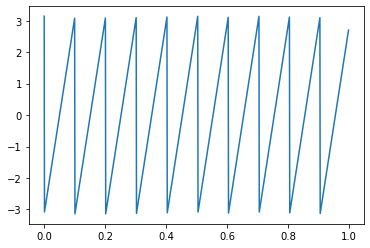

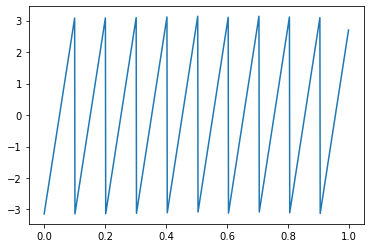

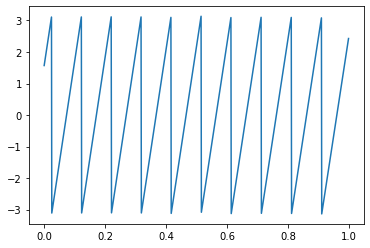

In [5]:
plt.plot(time,theta[:,0])    
plt.show()
plt.clf

plt.plot(time,theta[:,1]) 
plt.show()
plt.clf

plt.plot(time,theta[:,2]) 
plt.show()